# Multiple Linear Regression

In our original formulation of linear regression, we had a single feature (input variable).  Now we will 
expand to multiple features.

In [4]:
# Original data:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("housing.csv")
df[['sqft', 'price']].head()    # head() just gives you the first few rows

,sqft,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [5]:
# New data:

df.head()

,sqft,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Previously, our single feature was denoted by $x$.  Now, we will denote each feature by 
subscripting $x$: $x_1$, $x_2$, $x_3$, etc., up to however many features we have.

So above, we will call `sqft` $x_1$ and `bedrooms` $x_2$.  `price` is still our "output feature" --- the thing we're
trying to predict, denoted by $y$.

In the real world, we might have addition features like number of floors, age of the house, etc.

## Notation

- We'll use $x_j$ to represent the $j$'th feature.

- We'll use $n$ to represent the number of features.

- $\boldsymbol{x}^{(i)}$ will still represent the $i$'th training example, but now $\boldsymbol{x}$ is a vector!

- You will sometimes see $\vec{x}$ instead.

- We will usually write vectors as column vectors (this makes the math easier), though row vectors also exist.

$$\boldsymbol{x}^{(i)} = \begin{bmatrix}
           x_{1}^{(i)} \\
           x_{2}^{(i)} \\
           \vdots \\
           x_{n}^{(i)}
         \end{bmatrix}$$
         
**Old Model**: $f_{w, b}(x) = wx+b$

**New Model**: $f_{\boldsymbol{w}, b}(\boldsymbol{x}) = w_1x_1 + w_2x_2 + \cdots + b$

or equivalently:

**New Model**: $f_{\boldsymbol{w}, b}(\boldsymbol{x}) = \displaystyle \sum_{j=1}^n w_jx_j + b$

**Example**: If our model for housing prices is $f(x) = 0.1x_1 + 4x_2 + 80$, then you should think of this as "the base price of a house is 80 thousand dollars, and for every square foot ($x_1$) we add to the house, the price goes up by 0.1 thousand dollars (\$100), and for every bedroom we add to the house, the price goes up by 4 thousand dollars.

## Vectors

- We normally will also put our values for $w$ into a matrix:

$$\boldsymbol{w} = \begin{bmatrix}
           w_{1} \\
           w_{2} \\
           \vdots \\
           w_{n}
         \end{bmatrix}$$
         
- Because there are $n$ features, there are $n$ elements in this vector, one per feature.

- And now we can write our formula for $f$ much more simply:

- $f_{\boldsymbol{w}, b}(\boldsymbol{x}) = \boldsymbol{w} \cdot \boldsymbol{x} + b$ where the dot is the **dot product**.

- You will sometimes also see this written as 

- $f_{\boldsymbol{w}, b}(\boldsymbol{x}) = \boldsymbol{w}^T  \boldsymbol{x} + b$ where now we are doing **matrix multiplication**.

- This process is called vectorization.  We do this for a few reasons.  
  - Mathematical simplicity: makes our formulas look nicer, and it's easier to understand as long as you understand the symbols.
  - Computational simplicity: lets us write code using matrix libraries (like numpy).
  - Computational speed: many of these libraries are optimized for speed.

- Example:

    ```
    f = w[0] * x[0] + w[1] * x[1] + b  # Not great
    ```
    
    <P><hr>
    
    ```
    f = 0
    for j in range(0, n):
        f += w[j] * x[j]
    f += b                            # better
    ```
    
    <P><hr>
    
    ```
    f = np.dot(w, x) + b              # best
    ```

- Vectorized code often can use parallel hardware like multiple CPUs or GPUs.  Often the libraries (like NumPy) are implemented in such a way that even if we write the function calls in Python (like `np.dot(...)`), the libraries are implemented in (compiled) C code behind the scenes.

- We will see an improvement later to make it even faster!  (Get rid of that $b$ at the end).

- Vectorizing our code is the difference between time to train our model taking hours vs minutes.

## Gradient descent for multiple linear regression

**Old cost function:** $J(w,b)$

**New cost function:** $J(w_1, w_2, \ldots, b)$ or using vector notation 
$J(\boldsymbol{w}, b)$

The gradient descent update equations do not change much:

$$w_j = w - \alpha \cdot \frac{\partial}{\partial w} J(\boldsymbol{w}, b)$$

$$b = b - \alpha \cdot \frac{\partial}{\partial b} J(\boldsymbol{w}, b)$$

The derivative calculation itself doesn't change much either, we just
basically add a subscript to the $w$'s, so gradient descent becomes:

**repeat until convergence** {
$$w_1 = w_1 - \alpha  \frac{1}{m} \sum_{i=1}^m  \left( f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)}) - y^{(i)} \right)  x_1^{(i)}$$

$$w_2 = w_2 - \alpha  \frac{1}{m} \sum_{i=1}^m  \left( f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)}) - y^{(i)} \right)  x_2^{(i)}$$

$$\vdots$$

$$b = b - \alpha  \frac{1}{m} \sum_{i=1}^m  \left( f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)}) - y^{(i)} \right)  $$
}




## Real world considerations

### Feature scaling

- Gradient descent can have problems converging or fail to converge when we use features will very different ranges.

- Consider our two features $x_1$ and $x_2$, square feet and number of bedrooms.  One ranges from about 300-2000, and the other ranges from about 0-5.

- What will naturally happen is that because these features have different magnitudes, gradient descent will probably eventually find a small weight for $w_1$ and a larger weight for $w_2$ (though not necessarily).

- But if we start with random initial weights, or we make them all 1 at the beginning,
gradient descent may have a hard time figuring out to adjust the weights, because it may end up "bouncing around" the contour plot of the cost function $J$ before
getting on track.

### So what do we do about this?

A few solutions, ranging from simple to complex (actually they're all pretty simple!):

- Divide each feature by its maximum.  So if $x_1$ (square feet) ranges from 300-2000, we would not feed $x_1$ directly into our linear regression computations; instead we would use $x_1/2000$.  This effectively changes the maximum of the feature to be 1.

- Mean normalization: Replace each feature by the calculation: $$\frac{x_j-\mu_j}{\max(x_j) - \min(x_j)}$$ where $\mu_j$ is the mean value of $x_j$.

  This changes each feature to range between -1 and 1.
  
- Z-score normalization: Replace each feature by the calculation: $$\frac{x_j-\mu_j}{\sigma_j}$$ where $\mu_j$ is the mean value of $x_j$ and $\sigma_j$ is
the standard deviation of $x_j$.

  This changes each feature to range between "small-ish" values, but unlike mean normalization which will always compress the entire range between -1 and 1, Z-score normalization takes into account how "spread out" the values are and what their distribution looks like.

### In general

- Aim for each feature to be "roughly" between -1 and 1, within an order of magnitude.

- All of these ranges are fine (to co-exist): 
  - -1 to -1
  - -3 to 3
  - -0.3 to 0.3
  - 0 to 3 
  - -2 to 0.5
  
- But if you add something like -100 to 100 to the features above, it will "overpower" the existing features and might throw off gradient descent.

- Similarly, adding a feature like -0.001 to 0.001 might have the same effect.

- Interestingly, adding a feature with a large/small magnitude but a small range might also cause problems.  For instance, including a feature with the range 97-106 (e.g., body temperature) would be problematic and should be rescaled.

## Checking gradient descent for convergence

- As we saw in the lab, gradient descent does not always converge; one must
choose a good value of $\alpha$ to ensure convergence.

- We can monitor how well gradient descent is doing by graphing a **learning curve**.
This curve is a plot with the number of iterations of gradient descent on the
independent axis, and $J$ (cost) on the dependent axis.  In other words, we
are plotting cost as a function of time.

- As time (iteration) increases, the cost should decrease --- that indicates gradient
descent is working.  You want this curve to look like this:

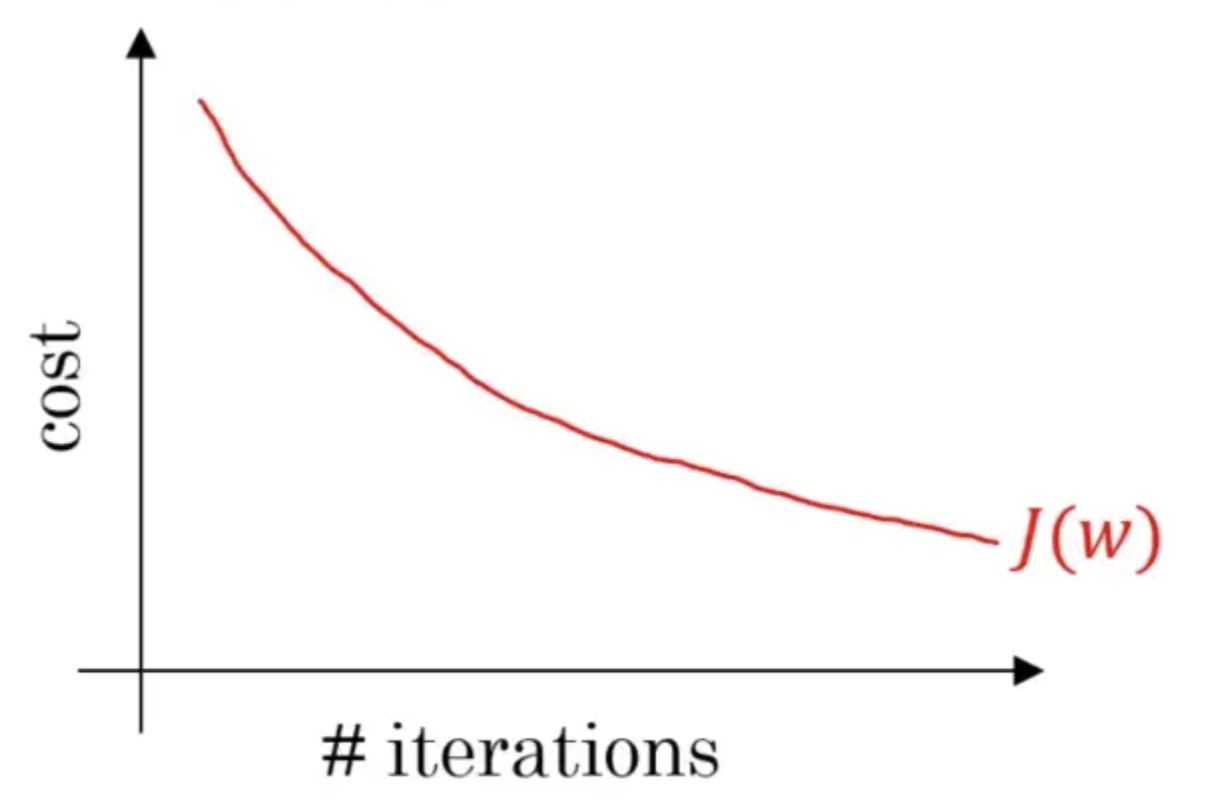


- If you've implemented gradient descent correctly, $J$ should never increase.  If it does, it usually means $\alpha$ is too large.

- If you have a smoothly descending learning curve, you can examine it to figure
out when gradient descent has done "good enough" and you can stop iterating.  In general, look for where the learning curve has leveled off and isn't changing much anymore.  The number of iterations this takes will vary depending on your data set, and can vary wildly.  It might take 30 iterations to converge, or it might take 3 million.

- We sometimes define a small number called epsilon ($\epsilon$),
and if the change in $J$ from one iteration to the next is smaller than
$\epsilon$, we stop the loop.  However, $\epsilon$ can be tricky to figure out
before looking at a learning curve.

### Picking a good $\alpha$

- Start with something on the smaller side, like $0.001$, and plot the learning
curve.  If the curve is consistently decreasing, that's good!  If it's not consistently decreasing, try decreasing $\alpha$ by a factor of 10, to $0.0001$,
and keep doing this until the learning curve consistently goes down.

- Once you have an $\alpha$ makes the learning curve consistently decrease,
we can work on getting it to converge.  If the curve is decreasing but not
converging (or converging very slowly), you can try raising alpha to something like $0.003$ or $0.005$, then $0.01$ and so on.

- If $\alpha$ starts making the learning curve increase, then that's your upper limit for $\alpha$ and you should try something smaller (maybe halfway between that upper limit and the previous value for $\alpha$ that worked?)

- Eventually, you should have an $\alpha$ that gives you a learning curve that 
decreases consistently and eventually *levels off*.  That's a good choice for $\alpha$.

## Feature Engineering

Feature engineering refers to creating new features from existing ones.

For instance, maybe your data set about housing prices includes information
about the plot of land on which the house sits: maybe it includes the *frontage* 
(the length of the side of the plot that sits against the street), and the *depth*
the length of the side of the plot between houses side-by-side.  But the real
factor that affects housing prices is probably the *product* of these two
pieces, not each piece separately.

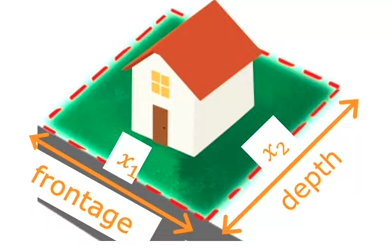

We could create a new feature $x_3 = x_1x_2$.
Note that linear regression can only create *linear* functions,
so if we only give $x_1$ and $x_2$ to the algorithm, it can never
multiply those two features together (that's a non-linear feature).

Without this feature, linear regression could only create models of the form:
$f(x) = w_1x_1 + w_2x_2 + b$, but after adding $x_3$, we now have:

$$f(x) = w_1x_1 + w_2x_2 + w_3x_3 + b$$ which effectively means we have

$$f(x) = w_1x_1 + w_2x_2 + w_3x_1x_2 + b$$

So we can make linear regression learn non-linear things by adding new non-linear
features manually to the data set.

You often want/have to do this when you have particular knowledge or intuition
about the problem or data set.

### Polynomial regression

You can effectively get linear regression to perform **polynomial regression**
by adding in higher powers of individual features in your data set.

For example, if you plot your features and you notice that a graph of a certain
(input) feature versus the prediction variable seems to look quadratic (or cubic),
rather than linear, you can add in the square (and cube) of that particular
feature into your data set.  This effectively lets you use linear regression
to fit curves of the form:

$f(x) = w_1x + w_2x^2 + w_3x^3 + \cdots + b$, 

up to whatever power you want.

Note that **feature scaling** is **very important** here, because squaring and cubing
features will drastically change their ranges.

You can of course add in other functions of features, like square root, or 
logarithms, or trigonometric functions.

# Multiple linear regression with matrices

Now that we know about vectorization, we can reframe some of our operations as matrix and vector operations that don't use loops.

First, let's remind ourself of some variables and notation:

- $m$: number of training examples.

- $n$: number of features.

- We write each $x$ (training example) now as a (column) vector:

$$\boldsymbol{x}^{(i)} = \begin{bmatrix}
           x_{1}^{(i)} \\
           x_{2}^{(i)} \\
           \vdots \\
           x_{n}^{(i)}
         \end{bmatrix}$$
         
- Since we have $m$ training examples ($m$ of these $x$ vectors), and each vector consists of $n$ components, we can store them in
a $m$ x $n$ matrix that we call $X$.  We transpose each of the $x$ vectors (so each one now spans a *row* instead of a *column*), and
then we store one training example per row.  So the dimensions of this matrix are $m$ rows by $n$ columns:

$$X = \underset{m \times n}{\begin{bmatrix}
           \longleftarrow & (x^{(1)}) ^T & \longrightarrow \\
           \longleftarrow & (x^{(2)}) ^T & \longrightarrow \\
           & \vdots & \\
           \longleftarrow & (x^{(m)}) ^T & \longrightarrow \\
         \end{bmatrix}} =
         \underset{m \times n}{\begin{bmatrix}
           x^{(1)}_1 & x^{(1)}_2 & \ldots &  x^{(1)}_n \\
           x^{(2)}_1 & x^{(2)}_2 & \ldots &  x^{(2)}_n \\
           \vdots & \vdots & \vdots &\vdots \\
           x^{(m)}_1 & x^{(m)}_2 & \ldots &  x^{(m)}_n \\
         \end{bmatrix}}$$
         
Similarly, we will store our corresponding $y$'s in a column vector of length $m$ called $\boldsymbol{y}$.  We typically
use uppercase variable names for matrices and lowercase variable names for vectors.

## Rethinking our parameters

- In single linear regression (with one feature), we  had two parameters, $w$ and $b$.  When we moved to multiple
linear regression, we changed $w$ from a scalar to a vector $\boldsymbol{w}$, but still had our scalar parameter $b$.

- With these parameters, our model for single linear regression was $f_{w,b}(x) = wx+b$ and for multiple 
linear regression it was $f_{\boldsymbol{w},b}(x) = \boldsymbol{w} \cdot x+b = \boldsymbol{w}^T x+b$ where we use the dot product
to multiply the $w$ and $x$ vectors rather than scalar multiplication.

- However, we can change our representation of our matrix $X$ slightly to integrate the "extra" parameter $b$ into the vector of parameters $w$.

  - By convention, we will add a column of 1's at the far left of our matrix $X$:
  
      $$\underset{m \times (n+1)}{\begin{bmatrix}
           1 & \longleftarrow & (x^{(1)}) ^T & \longrightarrow \\
           1 & \longleftarrow & (x^{(2)}) ^T & \longrightarrow \\
           \vdots & & \vdots & \\
           1 & \longleftarrow & (x^{(m)}) ^T & \longrightarrow \\
         \end{bmatrix}}$$
    Equivalently, we can think of this as *adding an extra feature* to each training example $x^{(i)}$ whose value is always 1.
    Think of these 1's as the 0'th feature of each training example: $x^{(i)}_0$.
    
    Note that this increases the dimensions of the $X$ matrix to $m$ rows and $n+1$ columns.
    
    At the same time, we change our $\boldsymbol{w}$ vector to have an extra parameter $w_0$ at the beginning:
    
    $$\boldsymbol{w} = \begin{bmatrix}
            w_0 \\
           w_{1} \\
           \vdots \\
           w_{n}
         \end{bmatrix}$$
         
  - Our new model becomes simply $f_w(x)=w\cdot x = w^T x$ using the dot product of $w$ and $x$.  Where did $b$ go?
    $b$ is now represented by the new weight $w_0$.  Because the dot product $w\cdot x = w^T x = \sum_{j=0}^n w_jx_j$, the weight
    $w_0$ is always getting multiplied by $x_0$, which is always 1, so the $w_0$ term becomes the new bias term, just like $b$ was.

## The cost function $J$ with matrices

- Without matrices, our cost function was $J(w, b)$.  Now with matrices, because we have absorbed $b$ into $w$, the new
function is just $J(w)$ (but remember $w$ is a vector).

$$J(w) = \frac{1}{2m}\sum_{i=1}^m \left( \hat{y}^{(i)}-{y}^{(i)} \right)^2 = \frac{1}{2m}\sum_{i=1}^m \left( f_w(x^{(i)})-{y}^{(i)} \right)^2$$

There's actually a fast way to calculate this with matrices.  Suppose we multiply $X$ by $w$:

$$\begin{split}Xw = \underset{m\times (n+1)}
{
    \begin{bmatrix}
    \longleftarrow & x^{(1)} & \longrightarrow \\
    \longleftarrow & x^{(2)} & \longrightarrow \\
    & \vdots & \\
    \longleftarrow & x^{(m)} & \longrightarrow \\
    \end{bmatrix}
}
\underset{(n+1) \times 1}
{
    \begin{bmatrix}
    \uparrow \\
    w \\
    \downarrow
    \end{bmatrix}
}
=\underset{m \times 1}{
\begin{bmatrix}
x^{(1)}\cdot w \\
x^{(2)}\cdot w \\
\vdots \\
x^{(m)}\cdot w
\end{bmatrix}}\end{split}$$

Notice that this is just a column vector of $\hat{y}$ predictions:

$$Xw=\begin{bmatrix}
x^{(1)}\cdot w \\
x^{(2)}\cdot w \\
\vdots \\
x^{(m)}\cdot w
\end{bmatrix} = 
\begin{bmatrix}
w \cdot x^{(1)} \\
w \cdot x^{(2)} \\
\vdots \\
w \cdot x^{(m)}
\end{bmatrix} = 
\begin{bmatrix}
\hat{y}^{(1)} \\
\hat{y}^{(2)} \\
\vdots \\
\hat{y}^{(m)}
\end{bmatrix} = \boldsymbol{\hat{y}}$$

How is this useful?  We're trying to compute the cost function, which includes subtracting the true $y$ values from
the predicted $\hat{y}$ values.  And we have a vector $\boldsymbol{y}$ from earlier, and we can compute:

$$\boldsymbol{\hat{y}} - \boldsymbol{y} = 
\begin{bmatrix}
\hat{y}^{(1)}- {y}^{(1)} \\
\hat{y}^{(2)}- {y}^{(2)} \\
\vdots \\
\hat{y}^{(m)}- {y}^{(m)}
\end{bmatrix} 
=
\begin{bmatrix}
w \cdot x^{(1)}- {y}^{(1)} \\
w \cdot x^{(2)}- {y}^{(2)} \\
\vdots \\
w \cdot x^{(m)}- {y}^{(m)}
\end{bmatrix} 
= Xw-\boldsymbol{y}$$

But we want each of these terms *squared*!  It turns out there's a neat way to get each term squared *and* then take the sums
of those squares.

> Aside: Whenever you have a vector where you want the sum of the squares of each entry in the vector, you can take
> the dot product of the vector *with itself*.  
> $$\sum_{i=1}^d v_i^2 = v\cdot v = v^T v$$

Using this fact, we can write:

$$J(w) = \frac{1}{2m}\sum_{i=1}^m \left( \hat{y}^{(i)}-{y}^{(i)} \right)^2 = \frac{1}{2m}(\boldsymbol{\hat{y}} - \boldsymbol{{y}})^T  (\boldsymbol{\hat{y}} - \boldsymbol{{y}}) = \frac{1}{2m}(Xw - \boldsymbol{y})^T(Xw - \boldsymbol{y})$$




## The gradient descent equations with matrices

- For (single) linear regression, we needed to compute $\dfrac{\partial}{\partial w} J(w, b)$ and 
$\dfrac{\partial}{\partial b} J(w, b)$ (two formulas).  

- With multiple linear regression (with our new matrices), we now need to compute $\dfrac{\partial}{\partial w_j} J(w, b)$ for 
$j=0, \ldots, n$.  Note that this is $n+1$ formulas, one for each feature, plus one for "feature zero" (the bias feature that is
always equal to 1, that is always is paired with $w_0$).

- The equations are not that different than what we presented above (except there's no formula for $b$):

$$\dfrac{\partial}{\partial w_j} J(w) = \frac{1}{m} \sum_{i=1}^m  \left( f_{\boldsymbol{w}}(\boldsymbol{x}^{(i)}) - y^{(i)} \right)  x_j^{(i)} = \frac{1}{m} \sum_{i=1}^m  \left( (\boldsymbol{w} \cdot \boldsymbol{x}^{(i)} - y^{(i)} \right)  x_j^{(i)}$$

- However, we can also fit all $n+1$ equations into a vector (that in multivariable calculus is called the **gradient**):

\begin{split}\nabla J(w) =
\begin{bmatrix}
\dfrac{\partial J(w)}{\partial w_0} \\
\dfrac{\partial J(w)}{\partial w_1} \\
\vdots \\
\dfrac{\partial J(w)}{\partial w_n} \\
\end{bmatrix}
=
\begin{bmatrix}
\dfrac{1}{m} \displaystyle \sum_{i=1}^{m} \left( \boldsymbol{w} \cdot \boldsymbol{x}^{(i)} - y^{(i)} \right)x_0^{(i)} \\
\dfrac{1}{m} \displaystyle \sum_{i=1}^{m} \left( \boldsymbol{w} \cdot \boldsymbol{x}^{(i)} - y^{(i)} \right)x_1^{(i)} \\
\vdots \\
\dfrac{1}{m} \displaystyle \sum_{i=1}^{m} \left( \boldsymbol{w} \cdot \boldsymbol{x}^{(i)} - y^{(i)} \right)x_n^{(i)} \\
\end{bmatrix}
\end{split}

There's actually a much more compact way of writing this vector above.  You might recognize some pieces: in particular,
notice that the $\boldsymbol{w} \cdot \boldsymbol{x}^{(i)} - y^{(i)}$ piece resembles the $Xw-y$ vector from earlier. 
There's a lot of matrix calculus going on behind the scenes which we're going to skip (you are responsible for understanding
partial derivatives, but no more).  In short, the vector above can be written as 

$$\nabla J(\boldsymbol{w}) = \dfrac{1}{m}(X^TX\boldsymbol{w} - X^T\boldsymbol{y}) = \frac{1}{m}X^T(X\boldsymbol{w}-\boldsymbol{y})$$

Though that looks like a huge ugly mess, think of it as a vector with $n+1$ numbers in it (same length as $\boldsymbol{w}$).

And then our gradient descent update equations can be written as one vector computation:

$$\boldsymbol{w_\text{new}} = \boldsymbol{w_\text{old}} - \alpha \nabla J(\boldsymbol{w})$$
or equivalently,
$$\boldsymbol{w_\text{new}} = \boldsymbol{w_\text{old}} - \alpha \frac{1}{m}(X^TX\boldsymbol{w}-X^T\boldsymbol{y})$$


## One last thing

It is possible for linear regression to obtain the exact solution
to minimizing the cost function $J$.  We can use matrices to do it:

$$\boldsymbol{w} = (X^TX)^{-1}X^T\boldsymbol{y}$$

This equation is obtained by taking the gradient from above, setting it equal to zero, and solving for $\boldsymbol{w}$.

This equation above is called the **normal equation**.  In general, very few
machine learning algorithms let you solve for the parameters in "closed form" like
this (closed form = there's an equation that gives you the exact solution, as
opposed to an iterative algorithm like gradient descent.)

Some libraries that implement linear regression use the normal equation rather
than gradient descent.